In [1]:
#Libraries Required
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sampler(w_1,T_s):
    answer = [(np.sin(w_1 * i)) for i in np.arange(0,1,T_s)]
    return answer

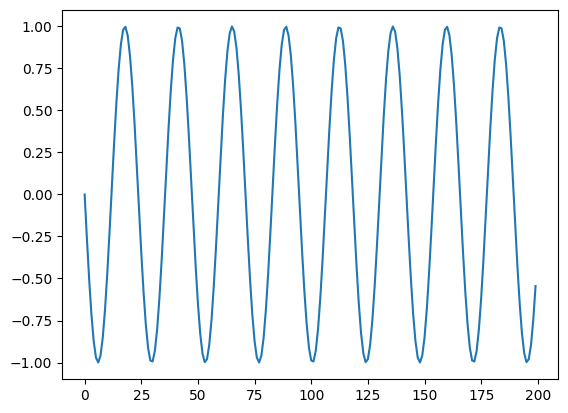

In [12]:
# Original Signal
f1 = 10000 /(2*np.pi)
w1 = 2 * np.pi * f1
Ts = 0.005
X = sampler(w1,Ts)
plt.plot(X)

In [ ]:
# The sampled signal